In [1]:
!pip install transformers

In [2]:
!pip install datasets

In [3]:
from datasets import load_dataset

In [4]:
emotion= load_dataset('emotion')

README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
emotion.set_format(type='pandas')
df= emotion['train'][:]

In [12]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


<Axes: xlabel='label'>

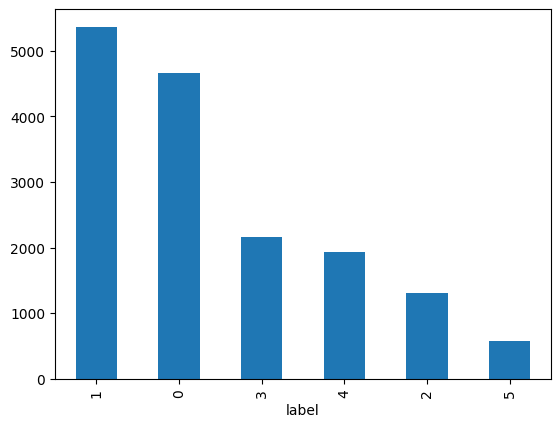

In [14]:
df.label.value_counts().plot(kind='bar')

In [15]:
df['length']= df['text'].apply(len)

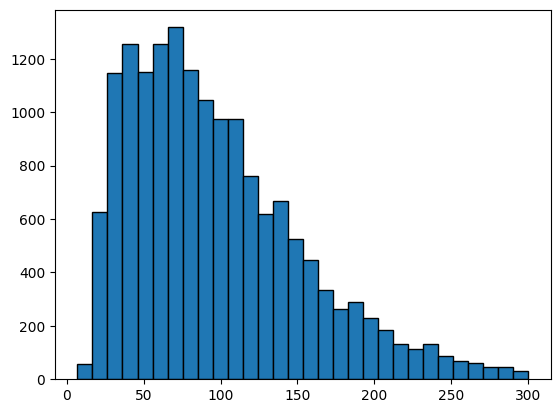

In [20]:
plt.hist(df['length'],bins=30,edgecolor='black');

In [21]:
from transformers import BertTokenizerFast

In [22]:
tokenizer= BertTokenizerFast.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [25]:
text1='Hai, How are you? , what are you doing?'
text2= 'I am fine, How about you?'
inputs=[text1,text2]

In [24]:
tokenizer.tokenize(text1)

['hai', ',', 'how', 'are', 'you', '?', ',', 'what', 'are', 'you', 'doing', '?']

In [26]:
tokenizer.tokenize(inputs)

['hai',
 ',',
 'how',
 'are',
 'you',
 '?',
 ',',
 'what',
 'are',
 'you',
 'doing',
 '?',
 'i',
 'am',
 'fine',
 ',',
 'how',
 'about',
 'you',
 '?']

In [27]:
tokenizer(text1,text2)

{'input_ids': [101, 15030, 1010, 2129, 2024, 2017, 1029, 1010, 2054, 2024, 2017, 2725, 1029, 102, 1045, 2572, 2986, 1010, 2129, 2055, 2017, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}